In [15]:
import os,sys
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array,load_img
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import warnings
from matplotlib import pyplot as plt
from PIL import Image

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# This function is for plotting images# This  
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

In [4]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 1402 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding a Dropout layer to avoid overfitting
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
#Minimize error for the loss function
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Training

In [7]:
nb_epoch = 15
nb_train_samples = 1402
nb_validation_samples = 101

#Train Model
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/15
87/87 [==============================] - 97s 1s/step - loss: 0.7023 - acc: 0.5375 - val_loss: 0.6599 - val_acc: 0.6226
Epoch 2/15
87/87 [==============================] - 93s 1s/step - loss: 0.6630 - acc: 0.6215 - val_loss: 0.6176 - val_acc: 0.6734
Epoch 3/15
87/87 [==============================] - 93s 1s/step - loss: 0.6236 - acc: 0.6661 - val_loss: 0.5987 - val_acc: 0.6820
Epoch 4/15
87/87 [==============================] - 82s 947ms/step - loss: 0.5625 - acc: 0.7139 - val_loss: 0.5825 - val_acc: 0.7028
Epoch 5/15
87/87 [==============================] - 90s 1s/step - loss: 0.5175 - acc: 0.7562 - val_loss: 0.6063 - val_acc: 0.7141
Epoch 6/15
87/87 [==============================] - 96s 1s/step - loss: 0.4741 - acc: 0.7851 - val_loss: 0.6227 - val_acc: 0.7114
Epoch 7/15
87/87 [==============================] - 104s 1s/step - loss: 0.4313 - acc: 0.8092 - val_loss: 0.6054 - val_acc: 0.7325
Epoch 8/15
87/87 [==============================] - 102s 1s/step - loss: 0.3827 - acc:

In [8]:
#Save weights
model.save_weights('models/basic_cnn_15_epochs.h5')

# Evaluate Model using validation set

model.evaluate_generator(validation_generator, nb_validation_samples)

[1.5859629965628037, 0.6746186944636041]

Found 10 images belonging to 1 classes.


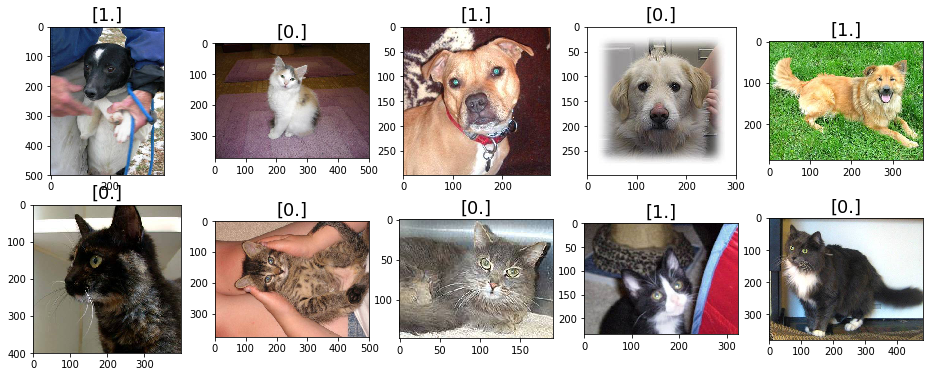

In [16]:
#Let's Predict some images using above model

imgs = ImageDataGenerator()

batches = imgs.flow_from_directory(
        'data/test',
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=4,
        class_mode=None)

filenames = batches.filenames
probs = model.predict_generator(batches)

plots([keras.preprocessing.image.load_img('data/test/' + filenames[i]) for i in range(10)], figsize=(16,6), rows=2, titles=probs)

In [17]:
# Data Augmentation Process to improve Accuracy

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        fill_mode='nearest',
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 1402 images belonging to 2 classes.


In [18]:
model.fit_generator(
        train_generator_augmented,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/15
43/43 [==============================] - 97s 2s/step - loss: 0.7184 - acc: 0.6131 - val_loss: 0.6108 - val_acc: 0.7036
Epoch 2/15
43/43 [==============================] - 97s 2s/step - loss: 0.6407 - acc: 0.6352 - val_loss: 0.5877 - val_acc: 0.7024
Epoch 3/15
43/43 [==============================] - 101s 2s/step - loss: 0.6355 - acc: 0.6564 - val_loss: 0.5990 - val_acc: 0.6543
Epoch 4/15
43/43 [==============================] - 130s 3s/step - loss: 0.6095 - acc: 0.6673 - val_loss: 0.6909 - val_acc: 0.7133
Epoch 5/15
43/43 [==============================] - 108s 3s/step - loss: 0.6204 - acc: 0.6730 - val_loss: 0.5654 - val_acc: 0.6731
Epoch 6/15
43/43 [==============================] - 110s 3s/step - loss: 0.5795 - acc: 0.7009 - val_loss: 0.5614 - val_acc: 0.6731
Epoch 7/15
43/43 [==============================] - 109s 3s/step - loss: 0.5962 - acc: 0.6882 - val_loss: 0.5781 - val_acc: 0.7133
Epoch 8/15
43/43 [==============================] - 94s 2s/step - loss: 0.5927 - acc:

In [19]:
model.save_weights('models/augmented_15_epochs.h5')

model.evaluate_generator(validation_generator, nb_validation_samples)

[1.668939435836343, 0.5353930392592131]

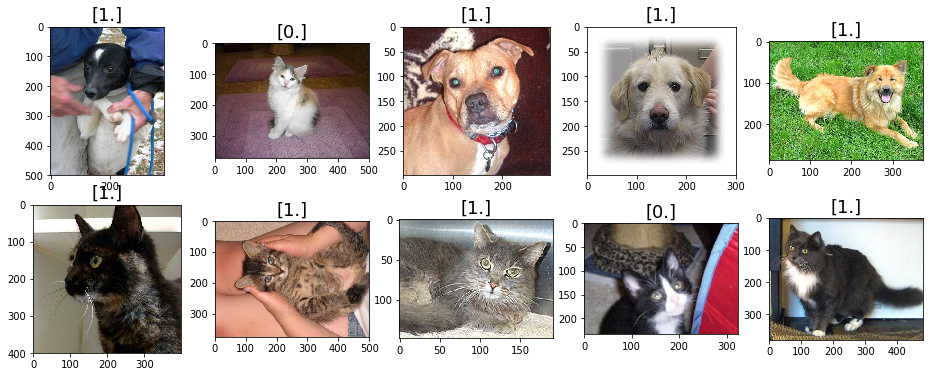

In [20]:
probs = model.predict_generator(batches)

plots([keras.preprocessing.image.load_img('data/test/' + filenames[i]) for i in range(10)], figsize=(16,6), rows=2, titles=probs)

<b>Using a pre-trained model</b>

The process of training a convolutionnal neural network can be very time-consuming and require a lot of datas.

We can go beyond the previous models in terms of performance and efficiency by using a general-purpose, pre-trained image classifier. This example uses VGG16, a model trained on the ImageNet dataset - which contains millions of images classified in 1000 categories.

On top of it, we add a small multi-layer perceptron and we train it on our dataset.

In [21]:
model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

In [26]:
import h5py
f  = h5py.File('models/vgg/vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model_vgg.layers) - 1:
        # we don't look at the last two layers in the savefile (fully-connected and activation)
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    layer = model_vgg.layers[k]

    if layer.__class__.__name__ in ['Convolution1D', 'Convolution2D', 'Convolution3D', 'AtrousConvolution2D']:
        weights[0] = np.transpose(weights[0], (2, 3, 1, 0))

    layer.set_weights(weights)

f.close()

ValueError: Layer weight shape (3, 3, 3, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [27]:
# Using the VGG16 model to process samples
train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

Found 1402 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [28]:
bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, nb_train_samples)
np.save(open('models/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, nb_validation_samples)
np.save(open('models/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)
 #Now we can load the data
train_data = np.load(open('models/bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load(open('models/bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

#Define and train the model
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))

model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

KeyboardInterrupt: 

In [ ]:
nb_epoch=20
model_top.fit(train_data, train_labels,
          nb_epoch=nb_epoch, batch_size=32,
          validation_data=(validation_data, validation_labels))

In [ ]:
model_top.evaluate(validation_data, validation_labels)

In [ ]:
##Fine-tuning the top layers of a a pre-trained network

model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

In [ ]:
import h5py
f = h5py.File('models/vgg/vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model_vgg.layers) - 1:
        # we don't look at the last two layers in the savefile (fully-connected and activation)
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    layer = model_vgg.layers[k]

    if layer.__class__.__name__ in ['Convolution1D', 'Convolution2D', 'Convolution3D', 'AtrousConvolution2D']:
        weights[0] = np.transpose(weights[0], (2, 3, 1, 0))

    layer.set_weights(weights)

f.close()

In [ ]:
#Build a classifier model to put on top of the convolutional model. 
#For the fine tuning, we start with a fully trained-classifer. 
#We will use the weights from the earlier model. And then we will add this model on top of the convolutional base.
top_model = Sequential()
top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

top_model.load_weights('models/bottleneck_40_epochs.h5')

model_vgg.add(top_model)

In [ ]:
for layer in model_vgg.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model_vgg.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration  . . . do we need this?
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

In [ ]:
# fine-tune the model
model_vgg.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

In [ ]:
model_vgg.save_weights('models/finetuning_20epochs_vgg.h5')
model_vgg.load_weights('models/finetuning_20epochs_vgg.h5')

#Evaluate
model_vgg.evaluate_generator(validation_generator, nb_validation_samples)

In [ ]:
probs = model_vgg.predict_generator(batches)

plots([keras.preprocessing.image.load_img('data/test/' + filenames[i]) for i in range(10)], figsize=(16,6), rows=2, titles=probs)